La base de données MNIST pour Modified ou Mixed National Institute of Standards and Technology, est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.

La reconnaissance de l'écriture manuscrite est un problème difficile, et un bon test pour les algorithmes d'apprentissage. La base MNIST est devenue un test standard1. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1. Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté1.

In [222]:
# Importer les modules nécessaires
import numpy as np  # Module pour les opérations mathématiques sur les tableaux multidimensionnels
import keras  # Bibliothèque pour l'apprentissage en profondeur
import seaborn as sns  # Bibliothèque pour la visualisation de données statistiques
from keras.models import load_model  # Fonction pour charger un modèle pré-entraîné
import os  # Module pour les opérations système
import random  # Module pour la génération de nombres aléatoires
import cv2  # Bibliothèque pour le traitement d'images
import matplotlib.pyplot as plt  # Bibliothèque pour la visualisation de données
from keras.models import Sequential  # Classe pour créer des modèles séquentiels
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation  # Classes pour les différentes couches du modèle
import pandas as pd  # Bibliothèque pour la manipulation de données tabulaires


In [223]:
# charger les données de MNIST depuis keras
# mnist = keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [224]:
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

In [225]:
# Lecture du fichier CSV contenant les données d'entraînement de MNIST
mnist_train = pd.read_csv('dataset/dataset/mnist_train.csv')

# Lecture du fichier CSV contenant les données de test de MNIST
mnist_test = pd.read_csv('dataset/dataset/mnist_test.csv')

# Extraction des caractéristiques (pixels) des images d'entraînement
x_train = mnist_train.iloc[:, 1:].values

# Extraction des étiquettes (chiffres) correspondant aux images d'entraînement
y_train = mnist_train.iloc[:, 0].values

# Extraction des caractéristiques (pixels) des images de test
x_test = mnist_test.iloc[:, 1:].values

# Extraction des étiquettes (chiffres) correspondant aux images de test
y_test = mnist_test.iloc[:, 0].values

In [226]:
mnist_train.head()
# Cette ligne de code affiche les premières lignes du dataframe mnist_train.
# La méthode .head() est utilisée pour afficher les premières lignes d'un dataframe.

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


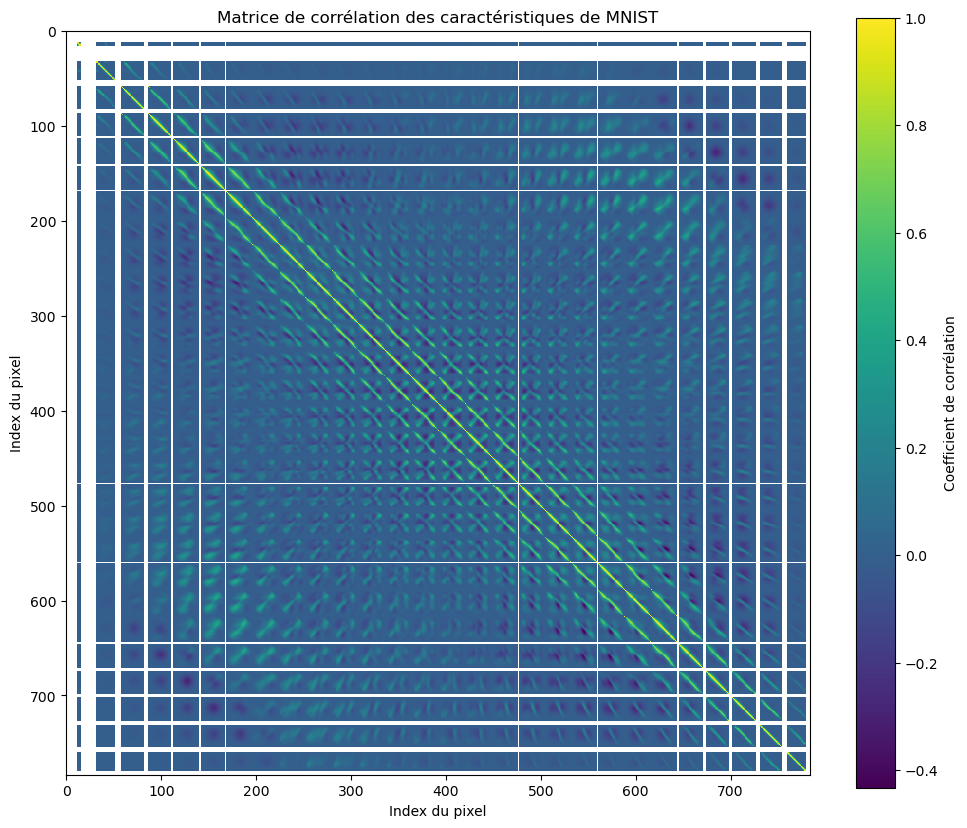

In [227]:
# Calculer la matrice de corrélation: Corrélation de Pearson
# Calculer la transposée de la matrice x_train
x_train_transpose = np.transpose(x_train)

# Calculer la matrice de corrélation
corr_matrix = np.corrcoef(x_train_transpose)

# Créer un tracé de la matrice de corrélation
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Coefficient de corrélation')
plt.title('Matrice de corrélation des caractéristiques de MNIST')
plt.xlabel('Index du pixel')
plt.ylabel('Index du pixel')
plt.show()


In [228]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)
# Cette ligne de code indique que nous allons remodeler les données pour les rendre compatibles avec un format de 28x28x1.
# Cela signifie que chaque image sera redimensionnée en une matrice de 28 lignes, 28 colonnes et 1 canal de couleur.
# Le canal de couleur est défini sur 1 car les images MNIST sont en noir et blanc, donc elles n'ont qu'un seul canal.
# Cette étape est nécessaire pour préparer les données d'entrée pour l'entraînement du modèle CNN.

In [229]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


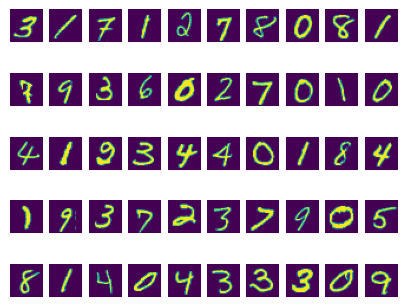

In [230]:
# afficher une image aléatoire 50 images de l'ensemble de données
fig, ax = plt.subplots(5, 10, figsize=(5, 4))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[random.randint(0, x_train.shape[0])])
    plt.axis('off')
plt.show()

In [231]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

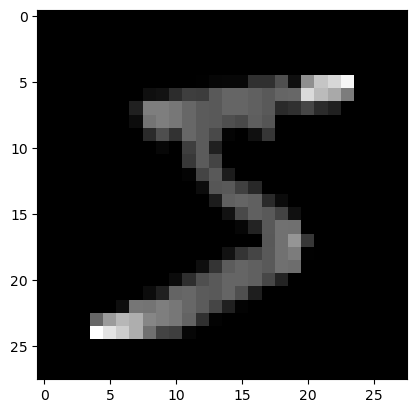

In [232]:
# normalisation des données
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
# afficher une image normalisée
plt.imshow(x_train[0], cmap=plt.cm.gray)

In [233]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [234]:
print(y_train[0])

5


In [235]:
# Définition de la taille des images
IMG_SIZE = 28

# Remodelage des données d'entraînement pour les rendre compatibles avec le modèle CNN
x_train_r = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Remodelage des données de test pour les rendre compatibles avec le modèle CNN
x_test_r = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Affichage de la forme des données d'entraînement remodelées
print("x_train.shape = ", x_train_r.shape)

# Affichage de la forme des données de test remodelées
print("x_test.shape = ", x_test_r.shape)


x_train.shape =  (60000, 28, 28, 1)
x_test.shape =  (10000, 28, 28, 1)


In [236]:
x_train_r.shape[1:]

(28, 28, 1)

In [237]:
model = Sequential()

# 1ère couche de convolution
model.add(Conv2D(64, (3, 3), input_shape=x_train_r.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2ème couche de convolution
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3ème couche de convolution
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Connexion
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(10))
model.add(Activation('softmax'))


Le package `keras.models` et les autres modules que vous avez importés sont des composants de la bibliothèque Keras, qui est une bibliothèque open source populaire pour la création et la formation de réseaux de neurones artificiels. Voici une explication de chaque module importé :

1. `keras.models.Sequential` :
   - `Sequential` est une classe de Keras qui permet de créer des modèles séquentiels, c'est-à-dire des modèles qui sont une simple pile de couches où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie.
   - Vous pouvez ajouter des couches à ce modèle séquentiel en séquence, et Keras s'occupera de connecter automatiquement les sorties des couches précédentes aux entrées des couches suivantes.

2. `keras.layers.Conv2D` :
   - `Conv2D` est une couche de convolution 2D. Les convolutions 2D sont couramment utilisées dans le traitement d'images pour extraire des caractéristiques en parcourant une matrice d'entrée avec un petit noyau de convolution.
   - Cette couche effectue une convolution spatiale sur les entrées en utilisant un certain nombre de filtres, ce qui produit une sortie qui est généralement une carte de caractéristiques.

3. `keras.layers.MaxPooling2D` :
   - `MaxPooling2D` est une opération de regroupement (pooling) qui réduit la dimensionnalité des cartes de caractéristiques en prenant le maximum sur une fenêtre donnée (généralement de taille 2x2) pour chaque région de l'entrée.

4. `keras.layers.Flatten` :
   - `Flatten` est une couche qui sert à aplatir les entrées en un vecteur. Cela est généralement utilisé pour passer de la sortie d'une couche de convolution ou de regroupement à une couche entièrement connectée.

5. `keras.layers.Dense` :
   - `Dense` est une couche de neurones entièrement connectée. Chaque neurone dans cette couche est connecté à tous les neurones de la couche précédente.
   - Cette couche prend en charge l'activation linéaire par défaut, mais vous pouvez spécifier une fonction d'activation (comme ReLU, softmax, etc.).

6. `keras.layers.Dropout` :
   - `Dropout` est une couche de régularisation qui désactive aléatoirement un certain nombre de neurones pendant l'entraînement afin de prévenir le surajustement (overfitting).

7. `keras.layers.BatchNormalization` :
   - `BatchNormalization` est une technique de normalisation qui normalise les activations de chaque couche pour réduire la dépendance entre les paramètres d'entraînement.

8. `keras.layers.Activation` :
   - `Activation` est une couche d'activation qui applique une fonction d'activation à la sortie de la couche précédente.


La formule mathématique de ce modèle CNN peut être décomposée comme suit :

Soit $ x $ une image en entrée avec des dimensions $ (H, W, C) $, où $ H $ est la hauteur, $ W $ est la largeur et $ C $ est le nombre de canaux de couleur.

1. **1ère couche de convolution** :
   - $ f^{[1]}(x) = \text{ReLU}(b^{[1]} + \sum_{i=1}^{64} W_{i}^{[1]} * x) $, où $ * $ représente la convolution, $ W_{i}^{[1]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, C) $, $ b^{[1]} $ est le biais, et $ \text{ReLU} $ est la fonction d'activation ReLU.
   - Après cette opération, une normalisation par lots (Batch Normalization) est appliquée.

2. **Pooling** :
   - Une opération de pooling MaxPooling2D est appliquée avec une fenêtre de pool de taille $ (2, 2) $.

3. **2ème couche de convolution** :
   - $ f^{[2]}(x) = \text{ReLU}(b^{[2]} + \sum_{i=1}^{128} W_{i}^{[2]} * f^{[1]}) $, où $ W_{i}^{[2]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, 64) $, $ b^{[2]} $ est le biais, et $ f^{[1]} $ est la sortie de la première couche de convolution.
   - Encore une fois, une normalisation par lots est appliquée.

4. **Pooling** :
   - MaxPooling2D est appliqué avec une fenêtre de pool de taille $ (2, 2) $.

5. **3ème couche de convolution** :
   - $ f^{[3]}(x) = \text{ReLU}(b^{[3]} + \sum_{i=1}^{256} W_{i}^{[3]} * f^{[2]}) $, où $ W_{i}^{[3]} $ est le $ i $-ème filtre de convolution avec une taille de $ (3, 3, 128) $, $ b^{[3]} $ est le biais, et $ f^{[2]} $ est la sortie de la deuxième couche de convolution.
   - Une normalisation par lots est appliquée après cette opération.

6. **Connexion** :
   - Les données sont aplaties en un vecteur.
   - Une couche entièrement connectée (Dense) avec 256 neurones est appliquée : $ f^{[4]}(x) = \text{ReLU}(b^{[4]} + W^{[4]} \cdot f^{[3]}) $, où $ W^{[4]} $ est la matrice de poids de taille $ (256, \text{taille\_aplatisse}) $ et $ b^{[4]} $ est le biais.

7. **Dropout** :
   - Dropout avec un taux de 0.5 est appliqué à la sortie de la couche Dense.

8. **Couche de sortie** :
   - Une couche Dense avec 10 neurones (pour 10 classes dans ce cas) est appliquée : $ f^{[5]}(x) = \text{softmax}(b^{[5]} + W^{[5]} \cdot f^{[4]}) $, où $ W^{[5]} $ est la matrice de poids de taille $ (10, 256) $ et $ b^{[5]} $ est le biais.

Ceci peut être résumé comme suit :

$$ \text{output} = f^{[5]}\left(f^{[4]}\left(f^{[3]}\left(\text{MaxPooling2D}\left(\text{ReLU}\left(\text{BatchNorm}\left(f^{[1]}\right)\right)\right)\right)\right)\right) $$

où chaque $ f^{[i]} $ représente une opération de transformation pour chaque couche.


In [238]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_20 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_21 (Ba  (None, 11, 11, 128)      

In [239]:
print("Total training samples = ", len(x_train_r))

Total training samples =  60000


In [240]:
import json
import os

if os.path.isdir('mnist.model'):
    # Charge le modèle
    model = load_model('mnist.model')
    with open('mnist.model/history.json', 'r') as h:
        history = json.load(h)
    # print(history)    
else:
    # Compilation du modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Entraîne et sauvegarde le modèle
    history = model.fit(x_train_r, y_train, batch_size=64, epochs=25, validation_data=(x_test_r, y_test))
    model.save('mnist.model')
    history = history
    with open('mnist.model/history.json', 'w') as h:
        json.dump(history.history, h)

In [241]:
# Évaluer le modèle sur les données d'entraînement
train_loss, train_acc = model.evaluate(x_train_r, y_train)

# Imprimer la perte du train et la précision du train
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

1875/1875 [==============================] - 36s 19ms/step - loss: 0.0014 - accuracy: 0.9995
Train loss: 0.0014002416282892227
Train accuracy: 0.9994999766349792


In [242]:
# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(x_test_r, y_test)

# Imprimer la perte et la précision du test
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 16ms/step - loss: 0.0441 - accuracy: 0.9906
Test loss: 0.04406682029366493
Test accuracy: 0.9905999898910522


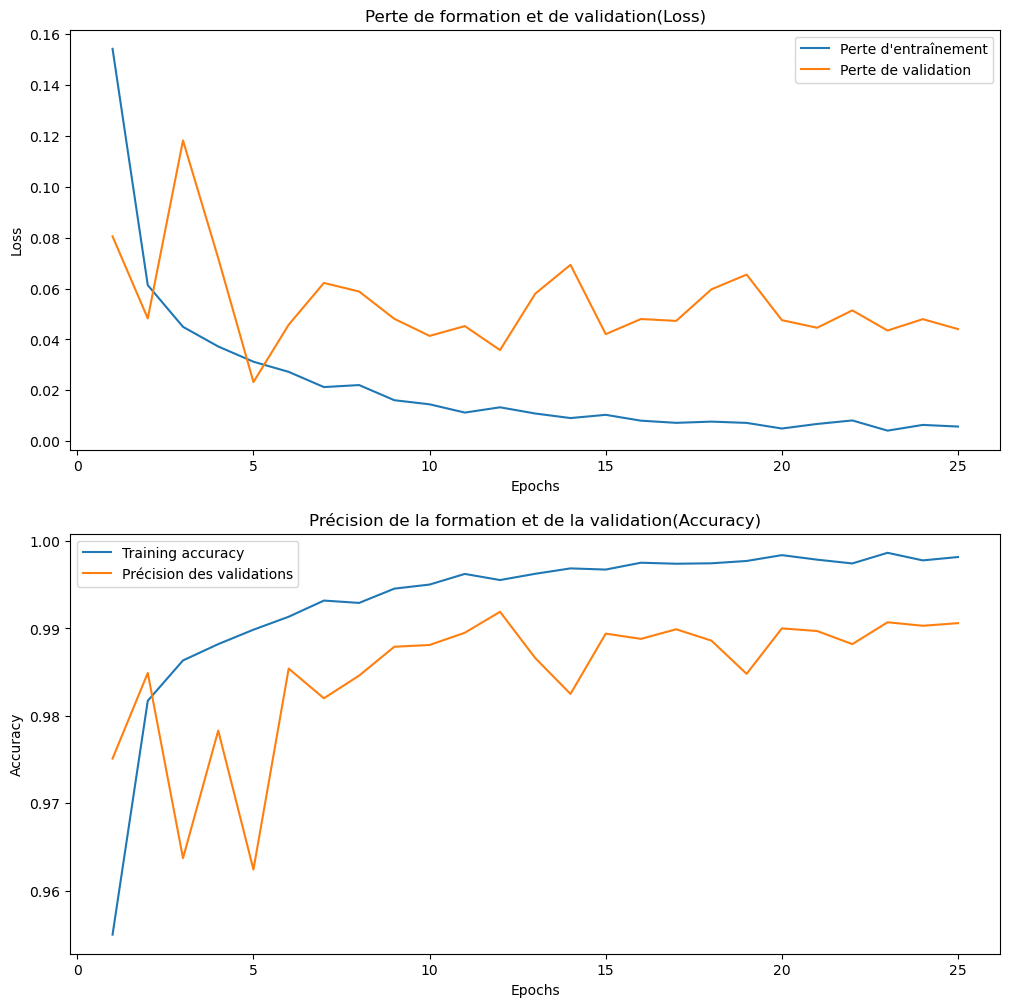

In [243]:
# Tracer les courbes
epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(epochs, history['loss'], label='Perte d\'entraînement')
plt.plot(epochs, history['val_loss'], label='Perte de validation')
plt.title('Perte de formation et de validation(Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, history['accuracy'], label='Training accuracy')
plt.plot(epochs, history['val_accuracy'], label='Précision des validations')
plt.title('Précision de la formation et de la validation(Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.tight_layout()
plt.show()

313/313 [==============================] - 6s 18ms/step


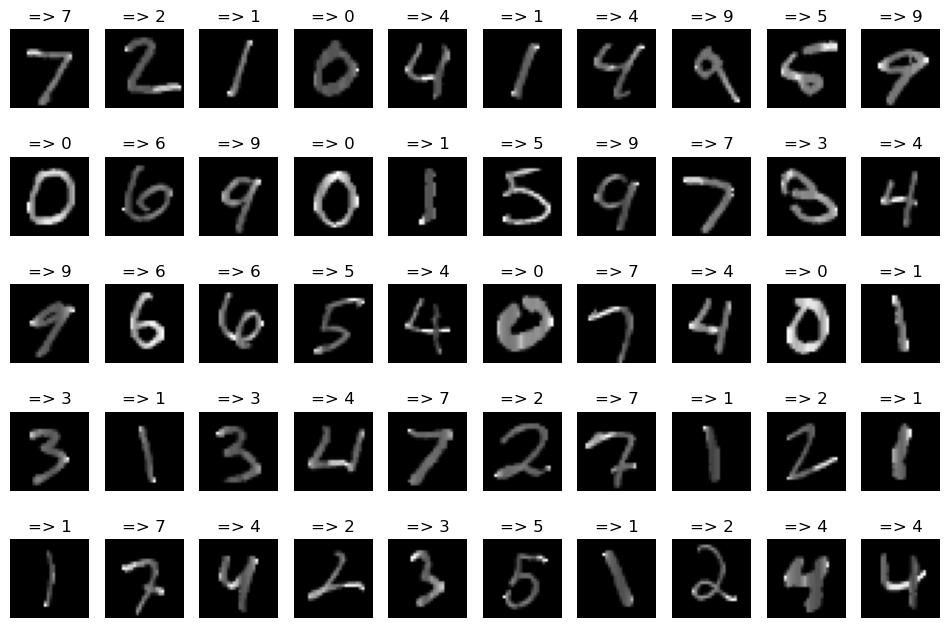

In [244]:
predictions = model.predict([x_test_r])
# Tracer les prédictions par rapport aux vraies étiquettes
fig, ax = plt.subplots(5, 10, figsize=(12, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"=> {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

In [245]:
print(np.argmax(predictions[0]))

7


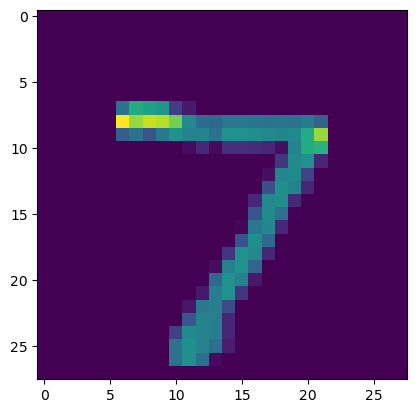

In [246]:
plt.imshow(x_test[0])

In [257]:
print(np.argmax(predictions[128]))

8


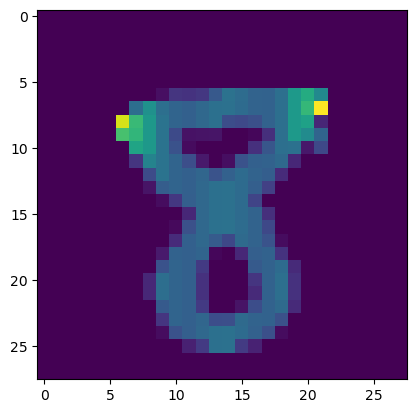

In [248]:
plt.imshow(x_test[128])

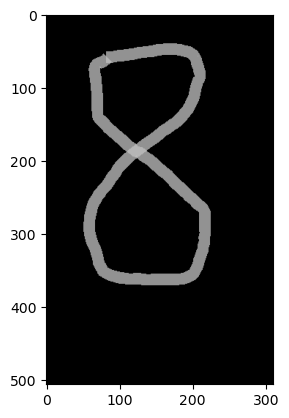

In [249]:
img = cv2.imread('test_8.png')          
plt.imshow(img)

In [250]:
img.shape

(506, 310, 3)

In [251]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get the shape of the grayscale image
gray.shape

(506, 310)

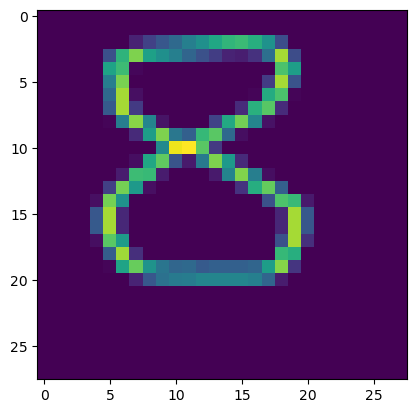

In [252]:
# Redimensionner l'image en utilisant la fonction resize de OpenCV
redim_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

# Afficher la forme de l'image redimensionnée
redim_img.shape

# Afficher l'image redimensionnée
plt.imshow(redim_img)


In [253]:
# Normaliser l'image
norm_img = keras.utils.normalize(redim_img, axis=1)

# Remodeler l'image normalisée pour correspondre à la forme d'entrée du modèle
norm_img = np.array(norm_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Afficher la forme de l'image normalisée
norm_img.shape

(1, 28, 28, 1)

In [254]:
prediction = model.predict(norm_img)
norm_img.shape

1/1 [==============================] - 0s 371ms/step


(1, 28, 28, 1)

In [255]:

print('la prédiction est :', np.argmax(prediction))


la prédiction est : 8
